STEP 1: DATA LOADING
Movies Rows: 45,466
Credits Rows: 45,476

Movies Columns: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']
Credits Columns: ['cast', 'crew', 'id']

STEP 2: DATA CLEANING & MERGING
After merging: 45,538 rows
Rows lost in merge: -72 (-0.16%)

STEP 3: DATA TYPE CONVERSION & TARGET CREATION

--------------------------------------------------------------------------------
CLASS DISTRIBUTION ANALYSIS
--------------------------------------------------------------------------------
Success counts:
success
0    39739
1     5799
Name: count, dtype: int64

Success proportions:
success
0    0.872656
1    0.127344
Name: proportion, dtype: float64

Class Imbalance:
   Ratio: 6.85:1 (Failures:Hi

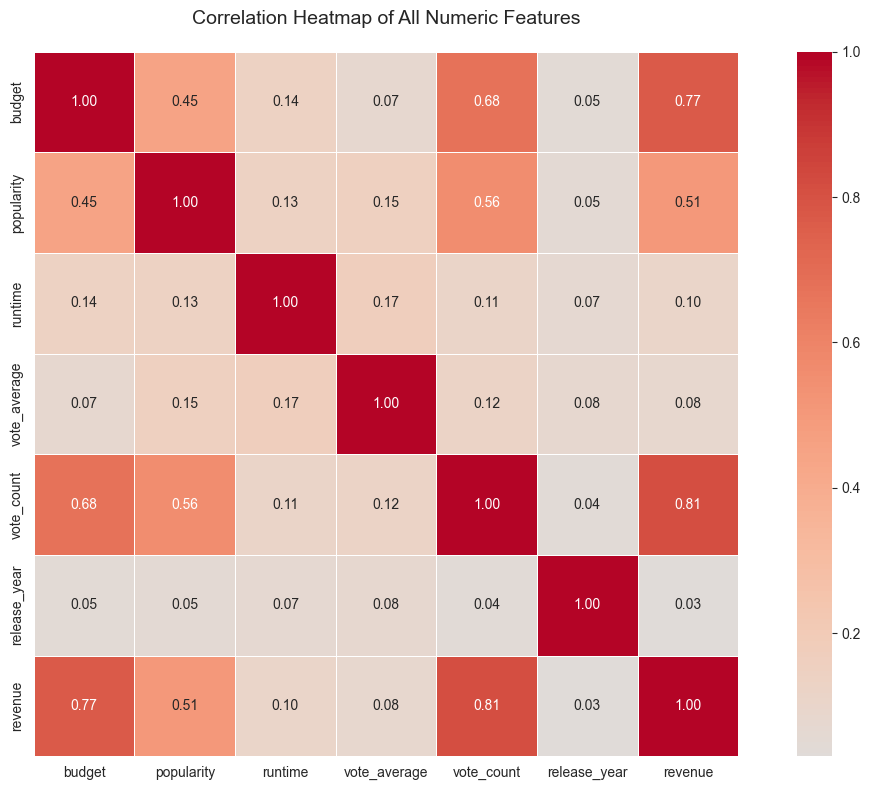


Feature Distributions:


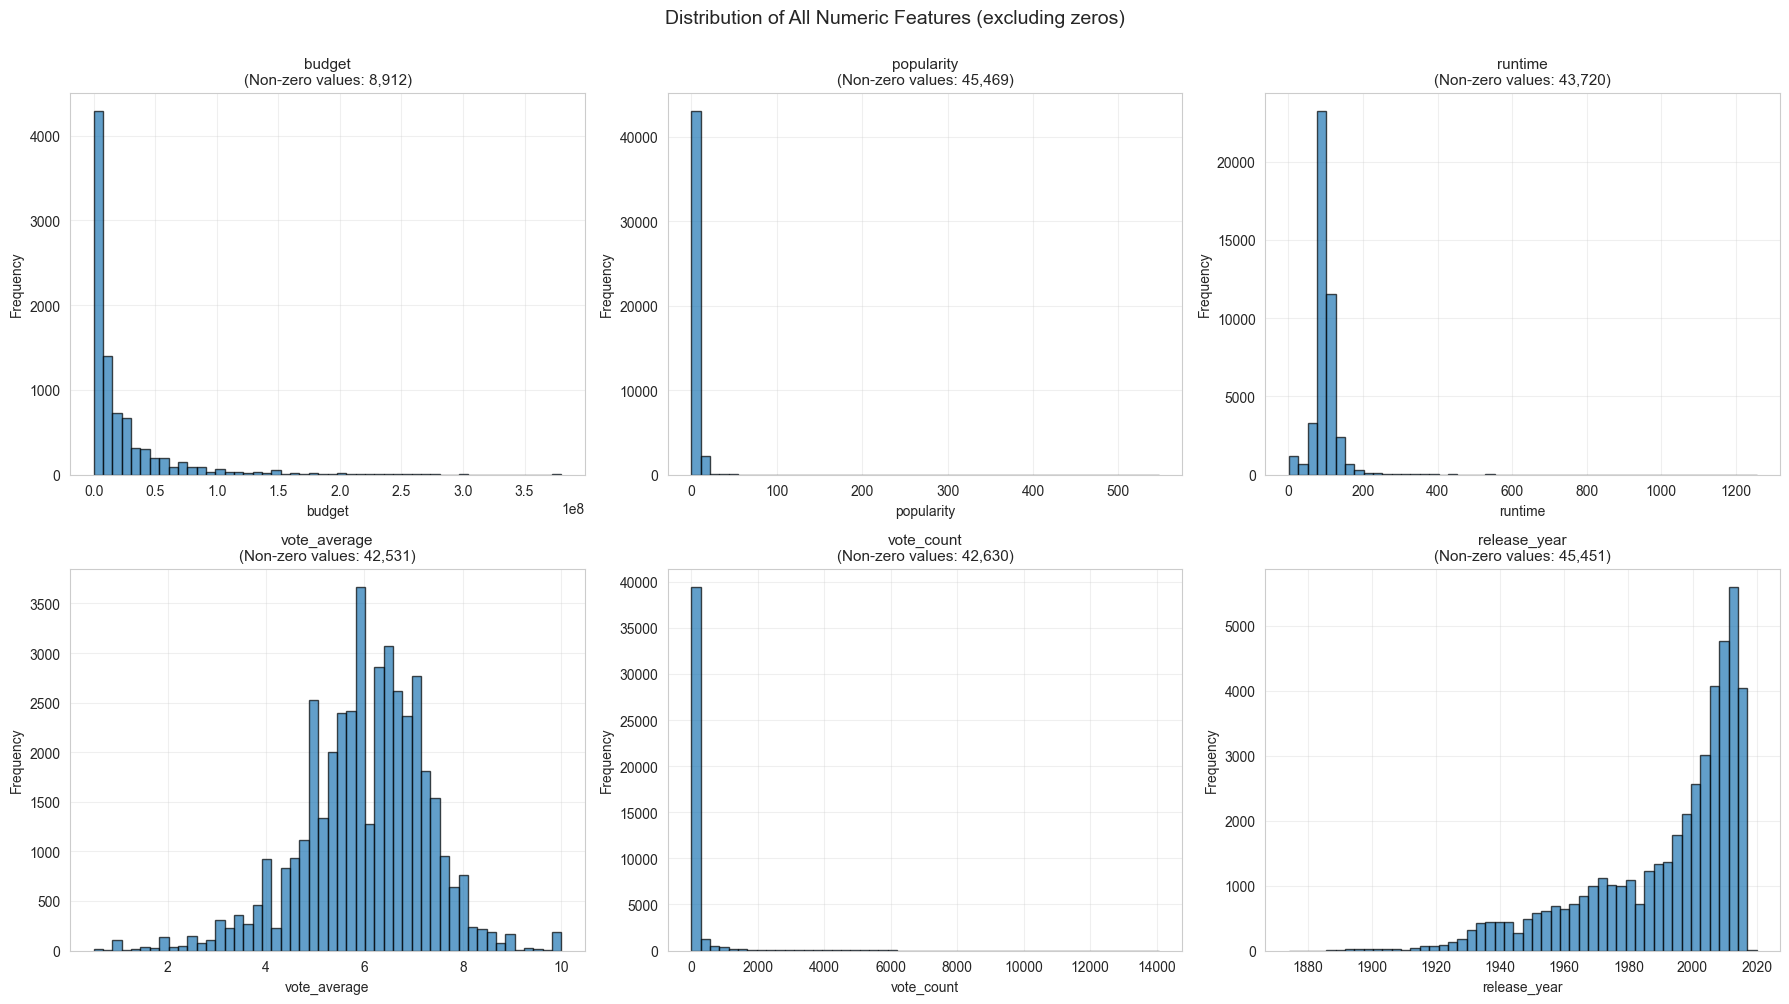


Budget-Revenue Correlation: 0.769

Hit Rate by Primary Genre (ALL GENRES):


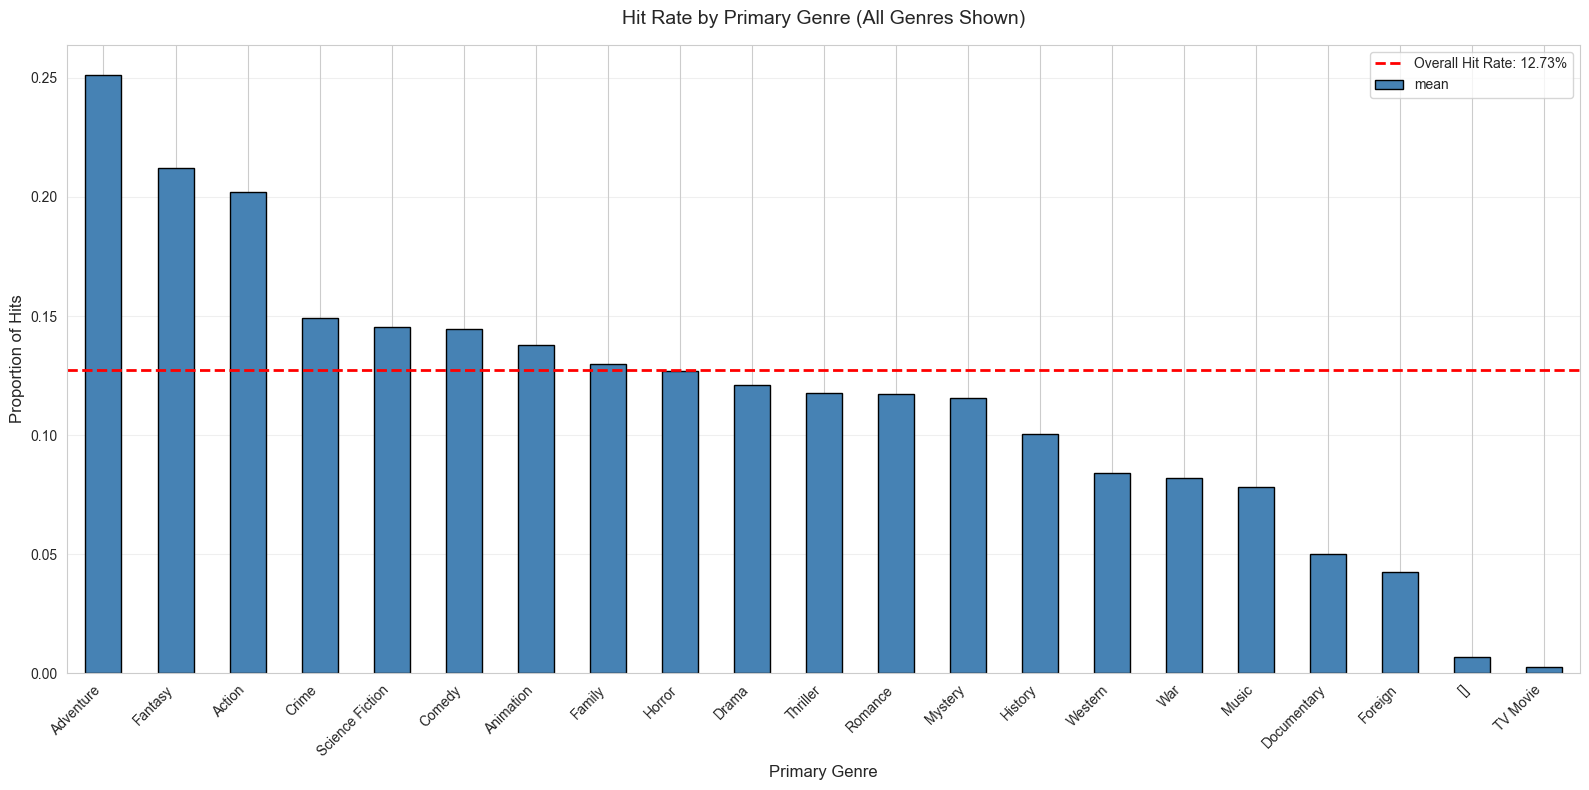


Genre Statistics (sorted by hit rate):
                     mean  count
primary_genre                   
Adventure        0.251312   1524
Fantasy          0.212164    707
Action           0.201957   4496
Crime            0.149289   1688
Science Fiction  0.145286    647
Comedy           0.144637   8829
Animation        0.137778   1125
Family           0.129771    524
Horror           0.126718   2620
Drama            0.120894  11994
Thriller         0.117823   1672
Romance          0.117450   1192
Mystery          0.115523    554
History          0.100358    279
Western          0.084257    451
War              0.081794    379
Music            0.078029    487
Documentary      0.050000   3420
Foreign          0.042373    118
[]               0.006962   2442
TV Movie         0.002564    390

Hit Rate Over Time (with Trend Line):


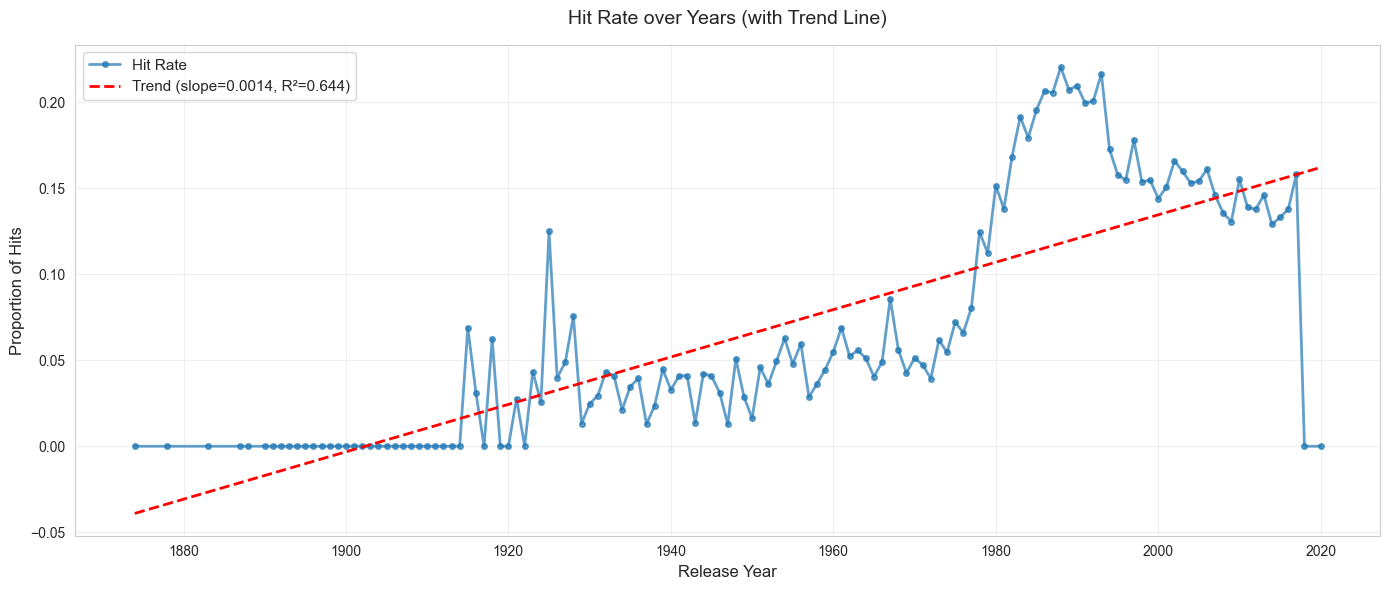

  Trend Analysis:
    Slope: 0.001379
    R²: 0.644
    p-value: 0.0000

Feature Values by Success (Hits vs Failures):


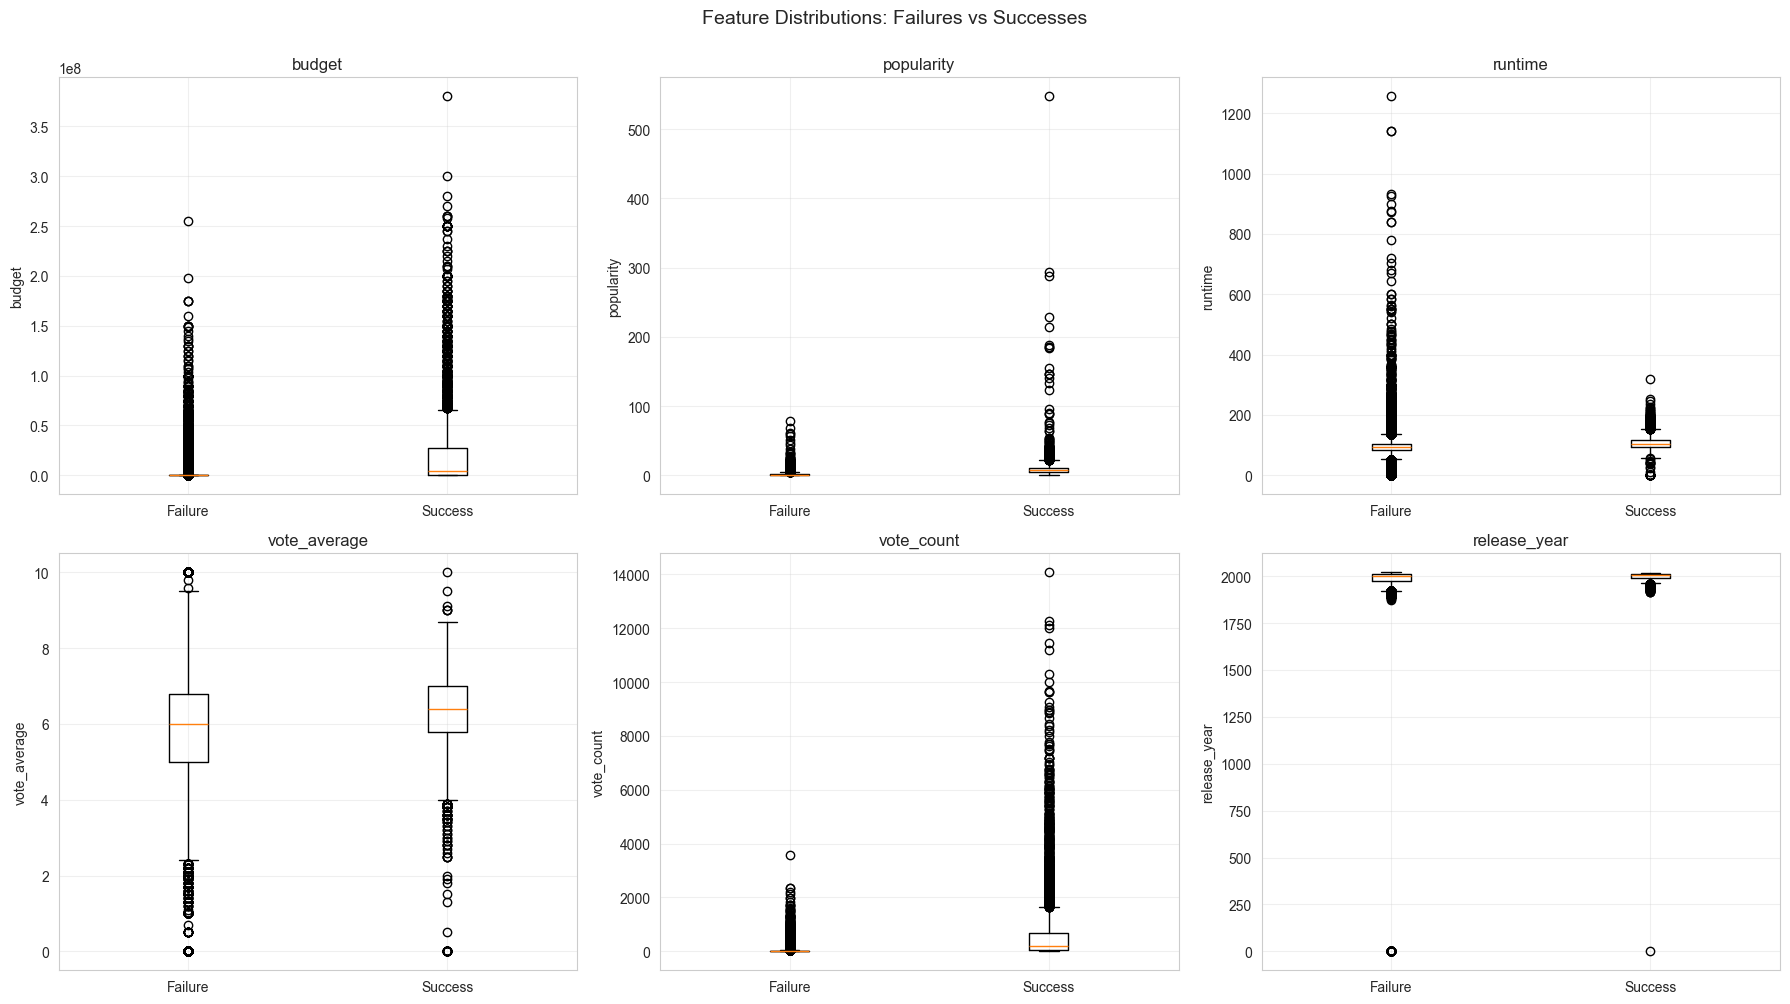


Mean Feature Values by Success:
               budget  popularity     runtime  vote_average  vote_count  release_year
Failure  1.578787e+06    2.035998   91.521780      5.518760   29.741664   1986.551775
Success  2.234532e+07    8.991361  107.771512      6.296982  658.291947   1998.525435

STEP 9: FEATURE PREPARATION
Features used: ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_year', 'primary_genre']

Before encoding:
Shape: (45538, 7)
Columns: ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_year', 'primary_genre']

After one-hot encoding:
Shape: (45538, 26)
Columns: ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_year', 'primary_genre_Adventure', 'primary_genre_Animation', 'primary_genre_Comedy', 'primary_genre_Crime', 'primary_genre_Documentary', 'primary_genre_Drama', 'primary_genre_Family', 'primary_genre_Fantasy', 'primary_genre_Foreign', 'primary_genre_History', 'primary_genre_Horror', 'primary_ge

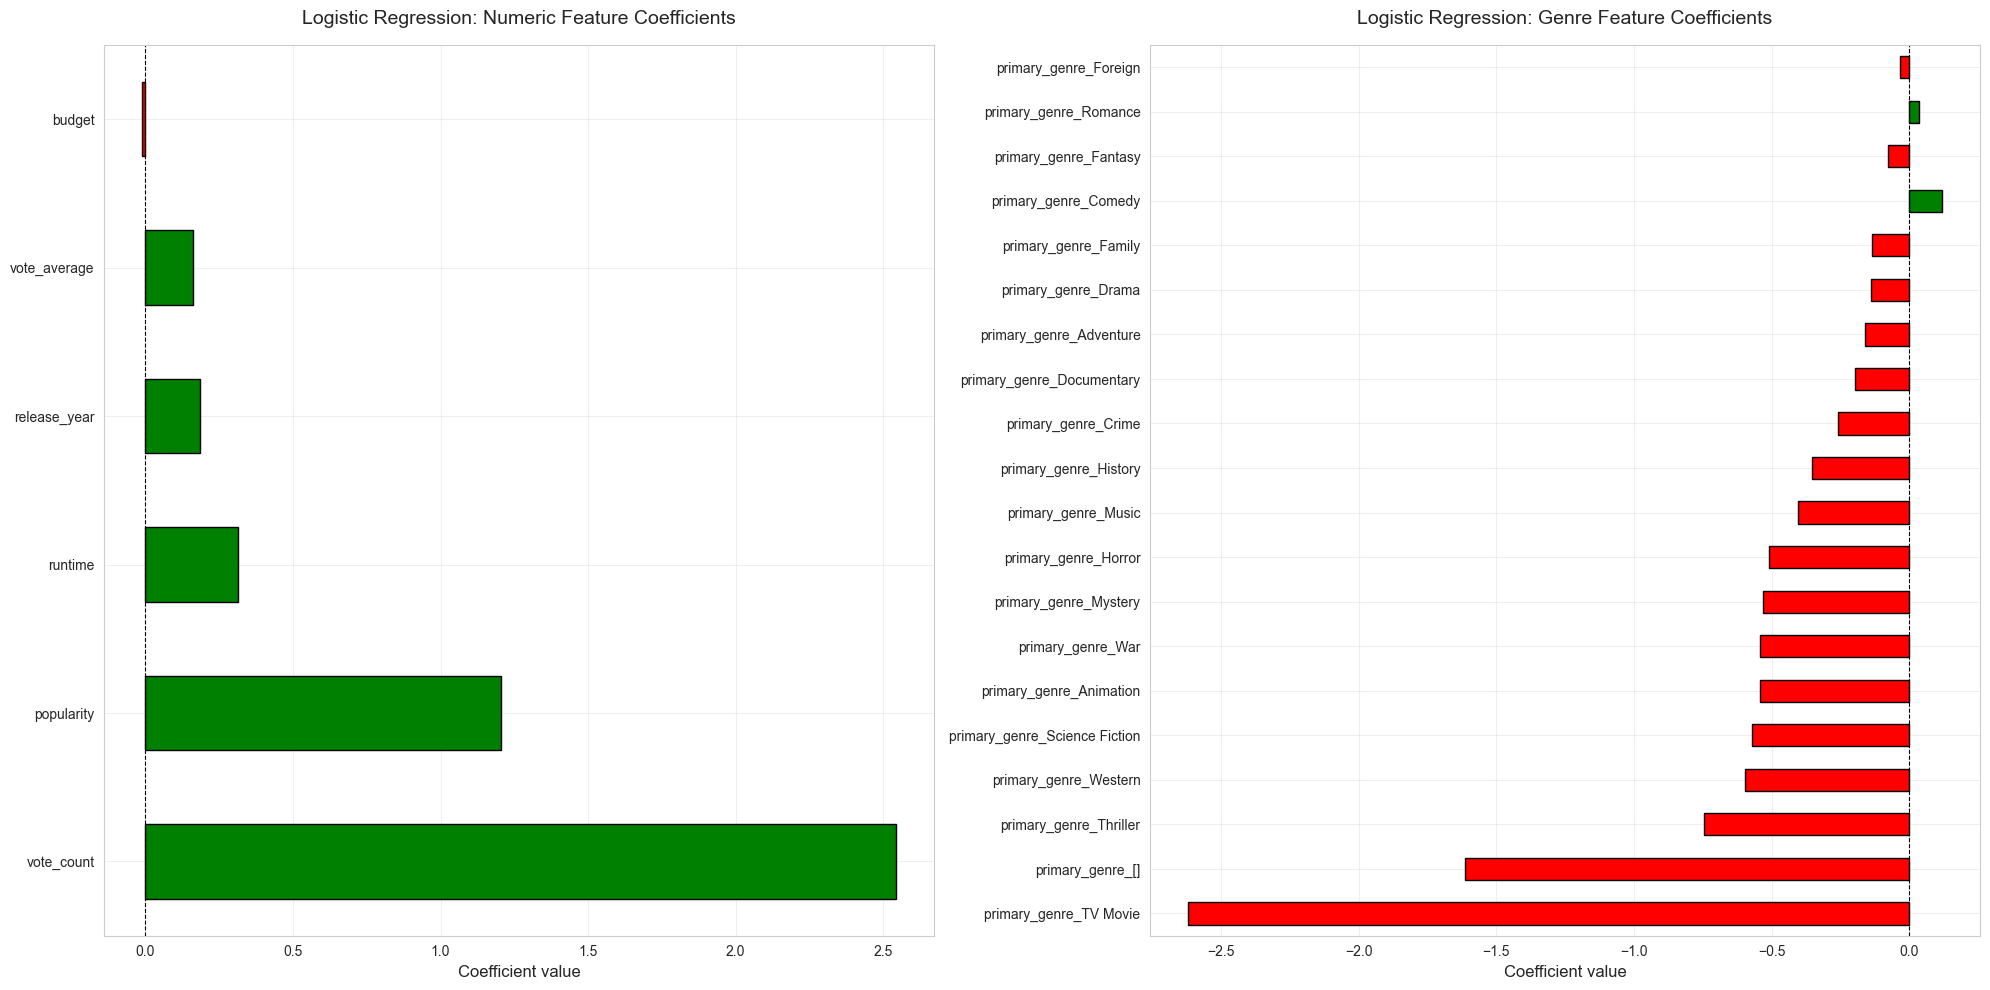


STEP 13: UNDERSTANDING COEFFICIENT PATTERNS

INTERPRETING MODEL COEFFICIENTS:

Budget Coefficient: -0.0116
- Budget-Revenue Correlation: 0.769
- Budget-Popularity Correlation: 0.450
- Budget-Vote Count Correlation: 0.677

Note: Linear models control for all features simultaneously. The budget coefficient
represents budget's effect AFTER accounting for popularity, votes, and other features.
This can differ from simple bivariate correlations.

Class Distribution Context:
- Successes: 5,799 (12.73%)
- Failures: 39,739 (87.27%)
- Ratio: 6.9:1

Models learn patterns from this distribution, which may affect coefficient signs
and magnitudes.


STEP 14: RANDOM FOREST FEATURE IMPORTANCES (ALL FEATURES)

Random Forest Feature Importances (ALL features):
popularity                       0.270785
vote_count                       0.252816
budget                           0.110157
release_year                     0.106782
runtime                          0.106085
vote_average                     0.

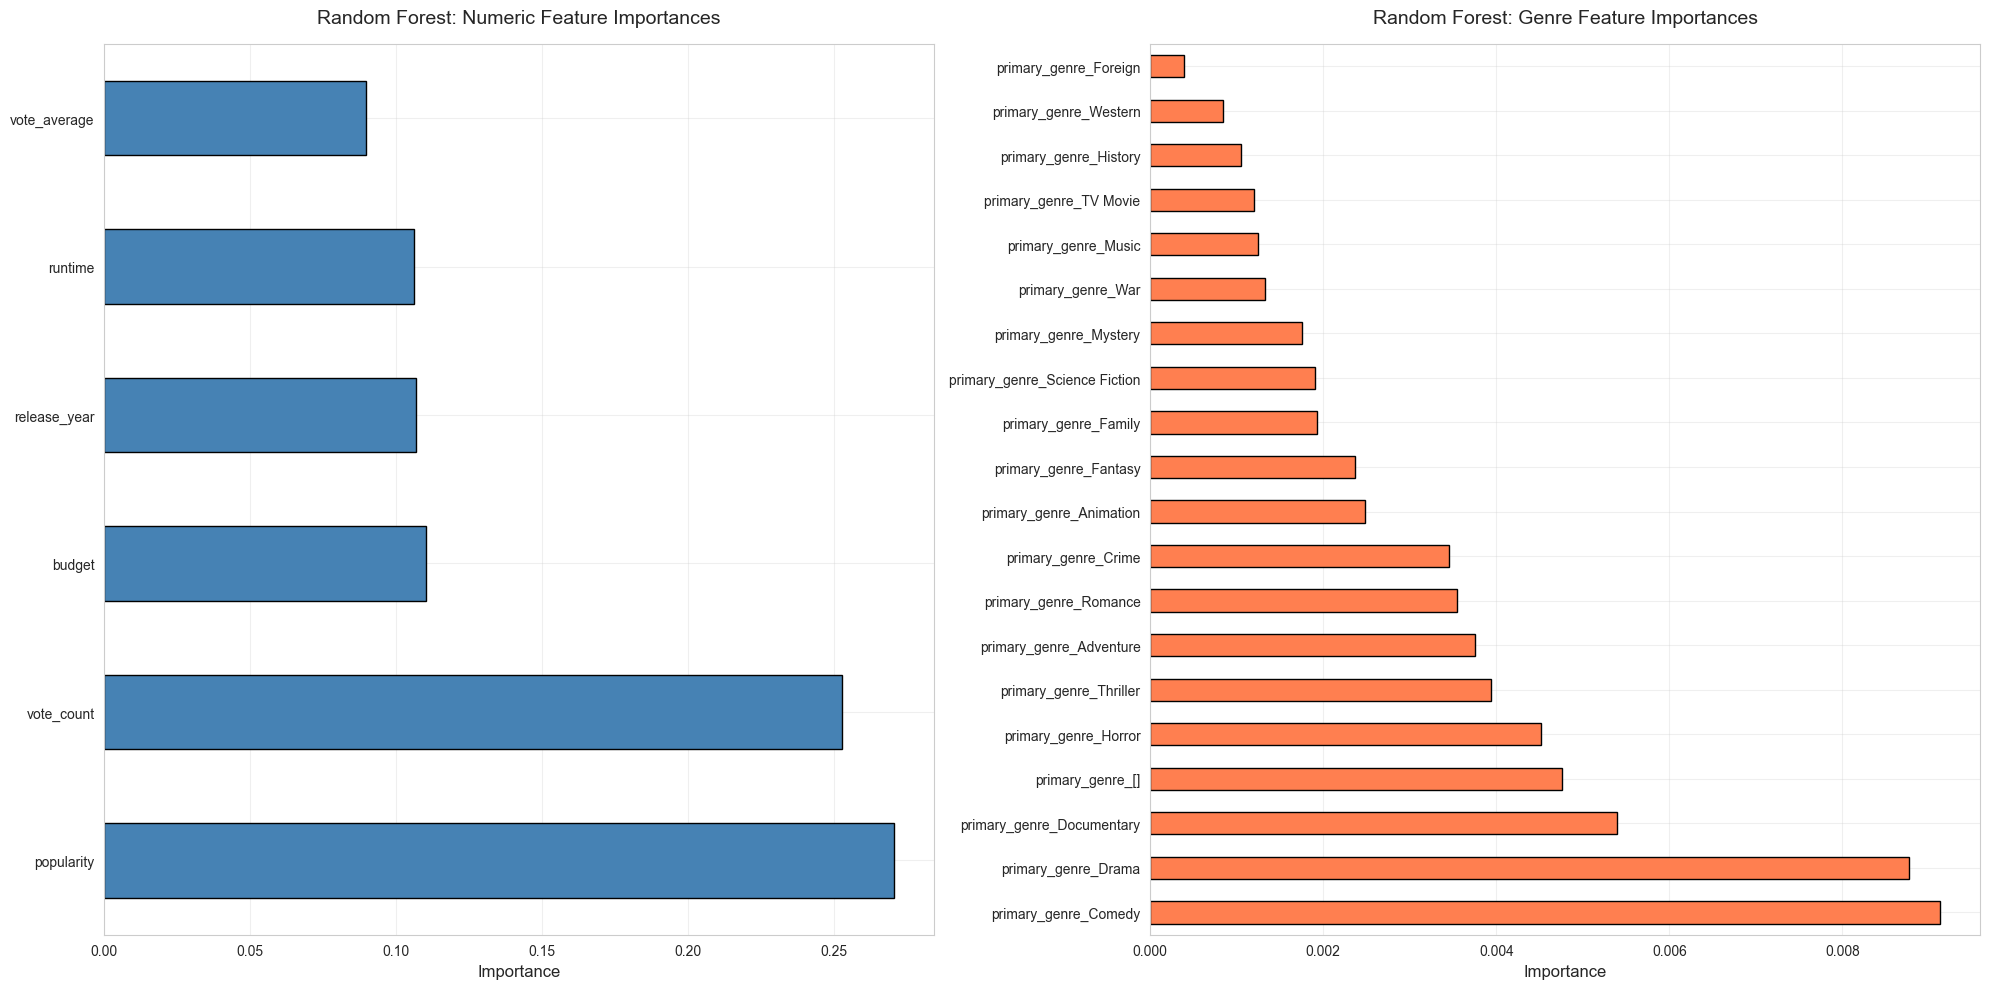


Note: Random Forest shows budget importance of 0.1102
      Random Forest can capture non-linear relationships and interactions
      that linear models may not detect.

COMPREHENSIVE ANALYSIS SUMMARY

FEATURES USED IN MODELING:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Numeric Features (6):
  1. budget        - Min: 0, Max: 380000000
  2. popularity    - Min: 0.00, Max: 547.49
  3. runtime       - Min: 0, Max: 1256
  4. vote_average  - Min: 0.0, Max: 10.0
  5. vote_count    - Min: 0, Max: 14075
  6. release_year  - Min: 0, Max: 2020

Categorical Features (1):
  7. primary_genre - 21 unique genres
                     (One-hot encoded to 20 binary features)

Total Features After Encoding: 26

TOP 5 MOST IMPORTANT FEATURES (Random Forest):
popularity      0.270785
vote_count      0.252816
budget          0.110157
release_year    0.106782
runtime         0.106085

TOP 5 LARGEST COEFFICIENTS (Logistic Regression):
primary_genre_TV Movie   -2.620932
vot

In [4]:
# ============================================================================
# MOVIE SUCCESS PREDICTION - COMPLETE FEATURE ANALYSIS
# ============================================================================
# Exploratory analysis of factors correlated with movie success
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
from scipy import stats
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# 1. DATA LOADING
# ============================================================================

print("="*80)
print("STEP 1: DATA LOADING")
print("="*80)

movies = pd.read_csv('movies_metadata.csv')
credits = pd.read_csv('credits.csv')

print(f'Movies Rows: {len(movies):,}')
print(f'Credits Rows: {len(credits):,}')
print(f'\nMovies Columns: {list(movies.columns)}')
print(f'Credits Columns: {list(credits.columns)}')

initial_movie_count = len(movies)
initial_credit_count = len(credits)

# ============================================================================
# 2. DATA CLEANING & MERGING
# ============================================================================

print("\n" + "="*80)
print("STEP 2: DATA CLEANING & MERGING")
print("="*80)

# Keep only rows with numeric 'id' values in movies
movies = movies[movies['id'].str.isnumeric()]

# Convert 'id' columns to integers
movies['id'] = movies['id'].astype(int)
credits['id'] = credits['id'].astype(int)

# Merge on 'id'
df = movies.merge(credits, on='id', how='inner')

print(f'After merging: {len(df):,} rows')
print(f'Rows lost in merge: {initial_movie_count - len(df):,} ({(initial_movie_count - len(df))/initial_movie_count*100:.2f}%)')

# ============================================================================
# 3. DATA TYPE CONVERSION & TARGET CREATION
# ============================================================================

print("\n" + "="*80)
print("STEP 3: DATA TYPE CONVERSION & TARGET CREATION")
print("="*80)

# Convert numeric columns
for col in ['budget','revenue','popularity','runtime','vote_average','vote_count']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    else:
        print(f"WARNING: {col} missing")

# Parse release_date
if 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['release_year'] = df['release_date'].dt.year.fillna(0).astype(int)
else:
    df['release_year'] = 0

# Create binary target: success (profit > 0)
if 'budget' in df.columns and 'revenue' in df.columns:
    df['success'] = (df['revenue'] > df['budget']).astype(int)
    
    print("\n" + "-"*80)
    print("CLASS DISTRIBUTION ANALYSIS")
    print("-"*80)
    print('Success counts:')
    print(df['success'].value_counts())
    print('\nSuccess proportions:')
    print(df['success'].value_counts(normalize=True))
    
    hits = df['success'].sum()
    failures = (~df['success'].astype(bool)).sum()
    imbalance_ratio = failures / hits if hits > 0 else 0
    
    print(f'\nClass Imbalance:')
    print(f'   Ratio: {imbalance_ratio:.2f}:1 (Failures:Hits)')
    print("-"*80)
else:
    raise KeyError("budget or revenue missing - cannot create label")

# ============================================================================
# 4. DATA CLEANING DOCUMENTATION
# ============================================================================

print("\n" + "="*80)
print("STEP 4: DATA CLEANING DOCUMENTATION")
print("="*80)

rows_before_cleaning = len(df)
df_clean = df.copy()

rows_after_cleaning = len(df_clean)
rows_lost = rows_before_cleaning - rows_after_cleaning

print(f"Rows before cleaning: {rows_before_cleaning:,}")
print(f"Rows after cleaning: {rows_after_cleaning:,}")
print(f"Rows lost: {rows_lost:,} ({rows_lost/rows_before_cleaning*100:.2f}%)")

df = df_clean

# ============================================================================
# 5. PARSE JSON COLUMNS
# ============================================================================

print("\n" + "="*80)
print("STEP 5: PARSE JSON COLUMNS")
print("="*80)

def parse_json_column(df, column_name, key='name', top_n=None):
    parsed_list = []
    for val in df[column_name].fillna('[]'):
        try:
            val = val.replace("'", '"')
            items = json.loads(val)
            names = [i[key] for i in items]
            if top_n:
                names = names[:top_n]
            parsed_list.append(names)
        except:
            parsed_list.append([])
    return parsed_list

df['genres_parsed'] = parse_json_column(df, 'genres')
df['cast_parsed'] = parse_json_column(df, 'cast', top_n=3)

def extract_directors(val):
    try:
        if pd.isna(val) or val.strip() == '':
            return []
        val = val.replace("'", '"')
        items = json.loads(val)
        directors = [i['name'] for i in items if i.get('job') == 'Director']
        return directors
    except:
        return []

df['directors_parsed'] = df['crew'].apply(extract_directors)

# Analyze genre information
df['num_genres'] = df['genres_parsed'].apply(len)

print("\n" + "-"*80)
print("GENRE INFORMATION ANALYSIS")
print("-"*80)
print(f"Movies with multiple genres: {(df['num_genres'] > 1).sum():,} ({(df['num_genres'] > 1).mean()*100:.2f}%)")
print(f"Average genres per movie: {df['num_genres'].mean():.2f}")
print("-"*80)

# ============================================================================
# 6. EXTRACT PRIMARY GENRE
# ============================================================================

print("\n" + "="*80)
print("STEP 6: EXTRACT PRIMARY GENRE")
print("="*80)

def extract_primary_genre(x):
    try:
        if pd.isna(x): 
            return 'Unknown'
        if isinstance(x, str) and x.strip().startswith('['):
            parsed = ast.literal_eval(x)
            if isinstance(parsed, list) and len(parsed) > 0:
                return parsed[0].get('name', 'Unknown')
        if isinstance(x, str) and ',' in x:
            return x.split(',')[0]
        return x
    except:
        return 'Unknown'

if 'genres' in df.columns:
    df['primary_genre'] = df['genres'].apply(extract_primary_genre)
else:
    df['primary_genre'] = 'Unknown'

print(f"Primary genres extracted. Sample:")
print(df[['genres','primary_genre']].head())

# ============================================================================
# 7. FEATURE SUMMARY
# ============================================================================

print("\n" + "="*80)
print("STEP 7: FEATURE SUMMARY")
print("="*80)

features_list = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_year', 'primary_genre']

print("\nALL FEATURES TO BE USED IN MODELING:")
print("-" * 80)
for i, feat in enumerate(features_list, 1):
    feat_type = "Categorical" if feat == 'primary_genre' else "Numeric"
    print(f"{i}. {feat:20s} - {feat_type}")
    
    if feat != 'primary_genre':
        print(f"   Min: {df[feat].min():.2f}, Max: {df[feat].max():.2f}, Mean: {df[feat].mean():.2f}")
        print(f"   Non-zero values: {(df[feat] != 0).sum():,} ({(df[feat] != 0).mean()*100:.1f}%)")
    else:
        print(f"   Unique values: {df[feat].nunique()}")
        print(f"   Top 5: {df[feat].value_counts().head().to_dict()}")
    print()

# ============================================================================
# 8. EXPLORATORY DATA ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("STEP 8: EXPLORATORY DATA ANALYSIS")
print("="*80)

# Correlation heatmap - ALL numeric features
print("\nCorrelation Heatmap (All Numeric Features):")
numeric_cols = ['budget','popularity','runtime','vote_average','vote_count','release_year','revenue']
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of All Numeric Features", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Individual feature distributions
print("\nFeature Distributions:")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

numeric_features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_year']

for idx, col in enumerate(numeric_features):
    # Filter out zeros for better visualization
    data_nonzero = df[df[col] > 0][col]
    
    axes[idx].hist(data_nonzero, bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}\n(Non-zero values: {len(data_nonzero):,})', fontsize=11)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle("Distribution of All Numeric Features (excluding zeros)", fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

# Budget-Revenue correlation
budget_revenue_corr = df[['budget', 'revenue']].corr().iloc[0, 1]
print(f"\nBudget-Revenue Correlation: {budget_revenue_corr:.3f}")

# Hit rate by genre - SHOW ALL GENRES
print("\nHit Rate by Primary Genre (ALL GENRES):")
hit_genre = df.groupby('primary_genre')['success'].agg(['mean', 'count']).sort_values('mean', ascending=False)

plt.figure(figsize=(16, 8))
hit_genre['mean'].plot(kind='bar', color='steelblue', edgecolor='black')
plt.ylabel("Proportion of Hits", fontsize=12)
plt.xlabel("Primary Genre", fontsize=12)
plt.title("Hit Rate by Primary Genre (All Genres Shown)", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=df['success'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Overall Hit Rate: {df["success"].mean():.2%}')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nGenre Statistics (sorted by hit rate):")
print(hit_genre.to_string())

# Release year trend
print("\nHit Rate Over Time (with Trend Line):")
release_year_success = df[df['release_year'] > 0].groupby('release_year')['success'].agg(['mean', 'count'])

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(release_year_success.index, release_year_success['mean'], 
        marker='o', linewidth=2, markersize=4, label='Hit Rate', alpha=0.7)

# Add trend line
valid_years = release_year_success.index.values
valid_rates = release_year_success['mean'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(valid_years, valid_rates)
trend_line = slope * valid_years + intercept
ax.plot(valid_years, trend_line, 'r--', linewidth=2, 
        label=f'Trend (slope={slope:.4f}, R²={r_value**2:.3f})')

ax.set_xlabel("Release Year", fontsize=12)
ax.set_ylabel("Proportion of Hits", fontsize=12)
ax.set_title("Hit Rate over Years (with Trend Line)", fontsize=14, pad=15)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"  Trend Analysis:")
print(f"    Slope: {slope:.6f}")
print(f"    R²: {r_value**2:.3f}")
print(f"    p-value: {p_value:.4f}")

# Feature vs Success analysis - ALL NUMERIC FEATURES
print("\nFeature Values by Success (Hits vs Failures):")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_features):
    # Box plot comparing hits vs failures
    data_to_plot = [df[df['success']==0][col], df[df['success']==1][col]]
    
    axes[idx].boxplot(data_to_plot, labels=['Failure', 'Success'])
    axes[idx].set_title(f'{col}', fontsize=12)
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle("Feature Distributions: Failures vs Successes", fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

# Statistical comparison
print("\nMean Feature Values by Success:")
comparison_df = df.groupby('success')[numeric_features].mean()
comparison_df.index = ['Failure', 'Success']
print(comparison_df.to_string())

# ============================================================================
# 9. FEATURE PREPARATION
# ============================================================================

print("\n" + "="*80)
print("STEP 9: FEATURE PREPARATION")
print("="*80)

# Features
features = ['budget','popularity','runtime','vote_average','vote_count','release_year','primary_genre']
X = df[features].copy()
y = df['success'].copy()

print(f"Features used: {features}")

print("\nBefore encoding:")
print(f"Shape: {X.shape}")
print(f"Columns: {list(X.columns)}")

# One-hot encode categorical feature
X = pd.get_dummies(X, columns=['primary_genre'], drop_first=True)

print("\nAfter one-hot encoding:")
print(f"Shape: {X.shape}")
print(f"Columns: {list(X.columns)}")
print(f"Genre columns created: {[col for col in X.columns if col.startswith('primary_genre_')]}")

# Scale numeric features
numeric_features_to_scale = ['budget','popularity','runtime','vote_average','vote_count','release_year']
scaler = StandardScaler()
X[numeric_features_to_scale] = scaler.fit_transform(X[numeric_features_to_scale])

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")
print(f"Class distribution in training: {y_train.value_counts(normalize=True).to_dict()}")

# ============================================================================
# 10. MULTICOLLINEARITY CHECK
# ============================================================================

print("\n" + "="*80)
print("STEP 10: MULTICOLLINEARITY CHECK (ALL FEATURES)")
print("="*80)

print("\nPairwise Correlations:")
for i, feat1 in enumerate(numeric_features):
    for feat2 in numeric_features[i+1:]:
        corr = pearsonr(df[feat1], df[feat2])[0]
        if abs(corr) > 0.3:  # Show correlations > 0.3
            print(f"  {feat1:15s} vs {feat2:15s}: {corr:6.3f}")

# ============================================================================
# 11. MODEL TRAINING
# ============================================================================

print("\n" + "="*80)
print("STEP 11: MODEL TRAINING")
print("="*80)

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'accuracy': accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }
    
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"Confusion Matrix:\n{results[name]['confusion_matrix']}")
    print(f"Classification Report:\n{results[name]['classification_report']}")

# ============================================================================
# 12. LOGISTIC REGRESSION COEFFICIENT ANALYSIS - ALL FEATURES
# ============================================================================

print("\n" + "="*80)
print("STEP 12: LOGISTIC REGRESSION COEFFICIENT ANALYSIS (ALL FEATURES)")
print("="*80)

logreg = results['Logistic Regression']['model']
coefficients = pd.Series(logreg.coef_[0], index=X_train.columns)
coefficients = coefficients.sort_values(key=abs, ascending=False)

print("\nLogistic Regression Coefficients (ALL features, sorted by magnitude):")
print(coefficients.to_string())

# Separate numeric and categorical coefficients
numeric_coefs = coefficients[[col for col in coefficients.index if not col.startswith('primary_genre_')]]
genre_coefs = coefficients[[col for col in coefficients.index if col.startswith('primary_genre_')]]

# Plot ALL coefficients
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Numeric features
colors = ['red' if x < 0 else 'green' for x in numeric_coefs.values]
numeric_coefs.plot(kind='barh', ax=axes[0], color=colors, edgecolor='black')
axes[0].set_title("Logistic Regression: Numeric Feature Coefficients", fontsize=14, pad=15)
axes[0].set_xlabel("Coefficient value", fontsize=12)
axes[0].axvline(0, color='black', linestyle='--', linewidth=0.8)
axes[0].grid(True, alpha=0.3)

# Genre features
colors = ['red' if x < 0 else 'green' for x in genre_coefs.values]
genre_coefs.plot(kind='barh', ax=axes[1], color=colors, edgecolor='black')
axes[1].set_title("Logistic Regression: Genre Feature Coefficients", fontsize=14, pad=15)
axes[1].set_xlabel("Coefficient value", fontsize=12)
axes[1].axvline(0, color='black', linestyle='--', linewidth=0.8)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 13. EXPLAINING COEFFICIENT PATTERNS
# ============================================================================

print("\n" + "="*80)
print("STEP 13: UNDERSTANDING COEFFICIENT PATTERNS")
print("="*80)

corr_budget_pop = pearsonr(df['budget'], df['popularity'])[0]
corr_budget_votes = pearsonr(df['budget'], df['vote_count'])[0]
corr_budget_revenue = pearsonr(df['budget'], df['revenue'])[0]

print(f"""
INTERPRETING MODEL COEFFICIENTS:

Budget Coefficient: {coefficients['budget']:.4f}
- Budget-Revenue Correlation: {corr_budget_revenue:.3f}
- Budget-Popularity Correlation: {corr_budget_pop:.3f}
- Budget-Vote Count Correlation: {corr_budget_votes:.3f}

Note: Linear models control for all features simultaneously. The budget coefficient
represents budget's effect AFTER accounting for popularity, votes, and other features.
This can differ from simple bivariate correlations.

Class Distribution Context:
- Successes: {hits:,} ({df['success'].mean()*100:.2f}%)
- Failures: {failures:,} ({(1-df['success'].mean())*100:.2f}%)
- Ratio: {imbalance_ratio:.1f}:1

Models learn patterns from this distribution, which may affect coefficient signs
and magnitudes.
""")

# ============================================================================
# 14. RANDOM FOREST FEATURE IMPORTANCES - ALL FEATURES
# ============================================================================

print("\n" + "="*80)
print("STEP 14: RANDOM FOREST FEATURE IMPORTANCES (ALL FEATURES)")
print("="*80)

rf_model = results['Random Forest']['model']
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\nRandom Forest Feature Importances (ALL features):")
print(feature_importances.to_string())

# Separate numeric and categorical importances
numeric_imps = feature_importances[[col for col in feature_importances.index if not col.startswith('primary_genre_')]]
genre_imps = feature_importances[[col for col in feature_importances.index if col.startswith('primary_genre_')]]

# Plot ALL importances
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Numeric features
numeric_imps.plot(kind='barh', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title("Random Forest: Numeric Feature Importances", fontsize=14, pad=15)
axes[0].set_xlabel("Importance", fontsize=12)
axes[0].grid(True, alpha=0.3)

# Genre features
genre_imps.plot(kind='barh', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title("Random Forest: Genre Feature Importances", fontsize=14, pad=15)
axes[1].set_xlabel("Importance", fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nNote: Random Forest shows budget importance of {feature_importances.get('budget', 0):.4f}")
print("      Random Forest can capture non-linear relationships and interactions")
print("      that linear models may not detect.")

# ============================================================================
# 15. COMPREHENSIVE SUMMARY
# ============================================================================

print("\n" + "="*80)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*80)

print(f"""
FEATURES USED IN MODELING:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Numeric Features (6):
  1. budget        - Min: {df['budget'].min():.0f}, Max: {df['budget'].max():.0f}
  2. popularity    - Min: {df['popularity'].min():.2f}, Max: {df['popularity'].max():.2f}
  3. runtime       - Min: {df['runtime'].min():.0f}, Max: {df['runtime'].max():.0f}
  4. vote_average  - Min: {df['vote_average'].min():.1f}, Max: {df['vote_average'].max():.1f}
  5. vote_count    - Min: {df['vote_count'].min():.0f}, Max: {df['vote_count'].max():.0f}
  6. release_year  - Min: {df['release_year'].min():.0f}, Max: {df['release_year'].max():.0f}

Categorical Features (1):
  7. primary_genre - {df['primary_genre'].nunique()} unique genres
                     (One-hot encoded to {len([col for col in X.columns if col.startswith('primary_genre_')])} binary features)

Total Features After Encoding: {X.shape[1]}

TOP 5 MOST IMPORTANT FEATURES (Random Forest):
{feature_importances.head().to_string()}

TOP 5 LARGEST COEFFICIENTS (Logistic Regression):
{coefficients.head().to_string()}

DATA SUMMARY:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Total samples: {len(df):,}
• Successes: {hits:,} ({df['success'].mean()*100:.2f}%)
• Failures: {failures:,} ({(1-df['success'].mean())*100:.2f}%)
• Imbalance ratio: {imbalance_ratio:.1f}:1

MODEL PERFORMANCE:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Random Forest Accuracy: {results['Random Forest']['accuracy']:.4f}
• Decision Tree Accuracy: {results['Decision Tree']['accuracy']:.4f}
• Logistic Regression Accuracy: {results['Logistic Regression']['accuracy']:.4f}
""")

print("="*80)


Hit Rate Over Time (with Trend Line):


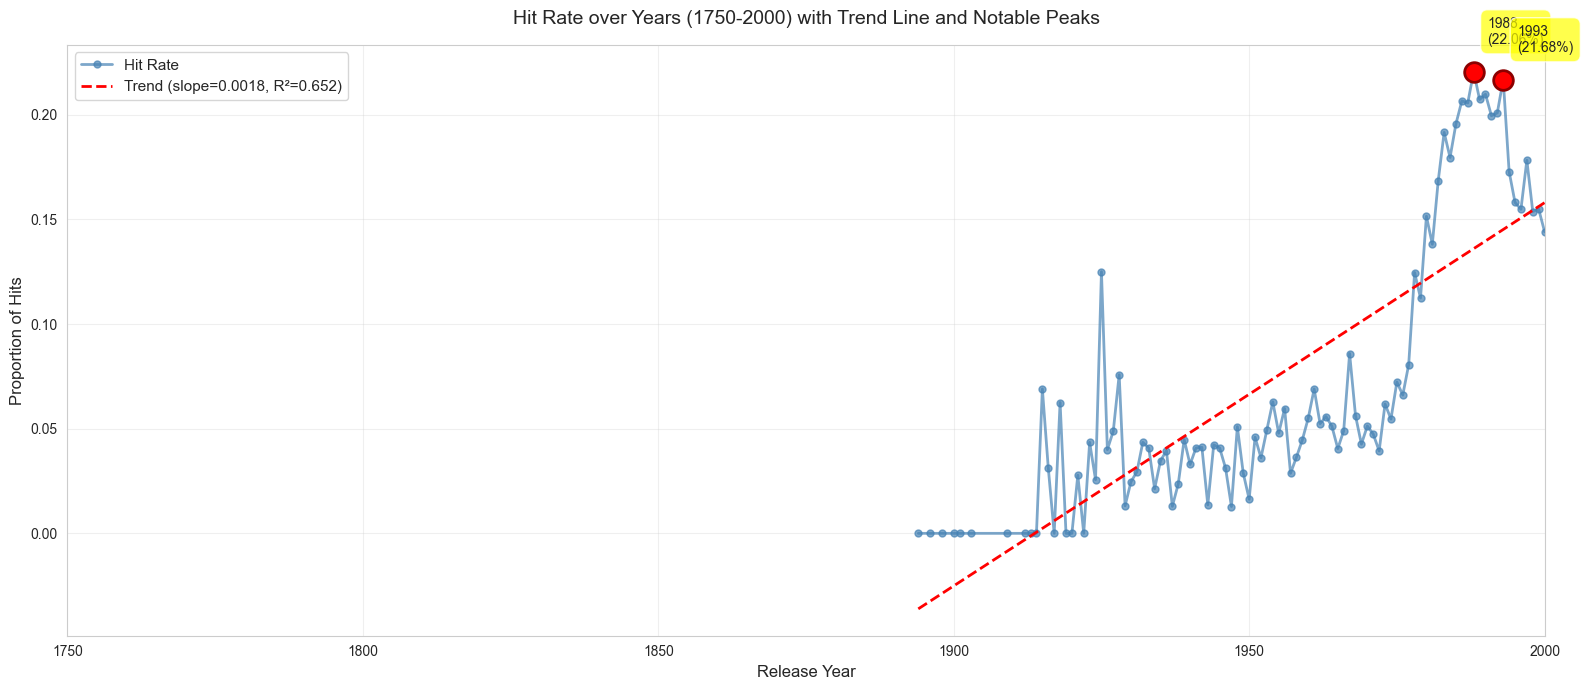

  Trend Analysis:
    Slope: 0.001831 (positive = increasing hit rate over time)
    R²: 0.652
    p-value: 0.0000

--------------------------------------------------------------------------------
NOTABLE PEAKS IN HIT RATE:
--------------------------------------------------------------------------------

1. YEAR 1988 - Hit Rate: 22.06% (467 movies)
   • Average budget: $2,565,328
   • Average revenue: $9,149,094
   • Number of hits: 103
   • Possible explanation: Golden age of blockbusters (1970s-1980s)
     - Rise of summer blockbusters (Jaws, Star Wars era)
     - Studios refined production strategies
     - Strong theatrical market before streaming competition

2. YEAR 1993 - Hit Rate: 21.68% (489 movies)
   • Average budget: $4,016,249
   • Average revenue: $14,791,657
   • Number of hits: 106
   • Possible explanation: 1990s boom period
     - Peak of VHS/DVD market creating additional revenue streams
     - Strong economy and increased movie attendance
     - Studios had refined 

In [2]:
# Release year trend (CORRECTED with proper x-axis limits and peak explanations)
print("\nHit Rate Over Time (with Trend Line):")

# Filter for valid years (1750-2000) and minimum sample size
release_year_success = df.groupby('release_year')['success'].agg(['mean', 'count'])
release_year_success = release_year_success[
    (release_year_success['count'] >= 10) & 
    (release_year_success.index >= 1750) & 
    (release_year_success.index <= 2000)
]

# Identify top peaks for explanation
top_peaks = release_year_success.nlargest(3, 'mean')

fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(release_year_success.index, release_year_success['mean'], 
        marker='o', linewidth=2, markersize=5, label='Hit Rate', alpha=0.7, color='steelblue')

# Highlight top peaks
for year in top_peaks.index[:2]:  # Highlight top 2 peaks
    hit_rate = top_peaks.loc[year, 'mean']
    count = top_peaks.loc[year, 'count']
    ax.scatter(year, hit_rate, s=200, color='red', zorder=5, 
               edgecolors='darkred', linewidth=2)
    ax.annotate(f'{year}\n({hit_rate:.2%})', 
                xy=(year, hit_rate), 
                xytext=(10, 20), 
                textcoords='offset points',
                fontsize=10, 
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Add trend line
valid_years = release_year_success.index.values
valid_rates = release_year_success['mean'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(valid_years, valid_rates)
trend_line = slope * valid_years + intercept
ax.plot(valid_years, trend_line, 'r--', linewidth=2, 
        label=f'Trend (slope={slope:.4f}, R²={r_value**2:.3f})')

# Set x-axis limits
ax.set_xlim(1750, 2000)
ax.set_xlabel("Release Year", fontsize=12)
ax.set_ylabel("Proportion of Hits", fontsize=12)
ax.set_title("Hit Rate over Years (1750-2000) with Trend Line and Notable Peaks", 
             fontsize=14, pad=15)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"  Trend Analysis:")
print(f"    Slope: {slope:.6f} (positive = increasing hit rate over time)")
print(f"    R²: {r_value**2:.3f}")
print(f"    p-value: {p_value:.4f}")

# Explain high points
print(f"\n" + "-"*80)
print("NOTABLE PEAKS IN HIT RATE:")
print("-"*80)

for i, (year, row) in enumerate(top_peaks.head(2).iterrows(), 1):
    hit_rate = row['mean']
    count = row['count']
    print(f"\n{i}. YEAR {int(year)} - Hit Rate: {hit_rate:.2%} ({int(count)} movies)")
    
    # Get sample movies from that year
    year_movies = df[df['release_year'] == year]
    if len(year_movies) > 0:
        hits_that_year = year_movies[year_movies['success'] == 1]
        avg_budget = year_movies['budget'].mean()
        avg_revenue = year_movies['revenue'].mean()
        
        print(f"   • Average budget: ${avg_budget:,.0f}")
        print(f"   • Average revenue: ${avg_revenue:,.0f}")
        print(f"   • Number of hits: {len(hits_that_year)}")
        
        # Possible explanations
        if year < 1900:
            print(f"   • Possible explanation: Early cinema era - fewer movies produced,")
            print(f"     potentially more selective production or data quality issues")
        elif year >= 1970 and year < 1990:
            print(f"   • Possible explanation: Golden age of blockbusters (1970s-1980s)")
            print(f"     - Rise of summer blockbusters (Jaws, Star Wars era)")
            print(f"     - Studios refined production strategies")
            print(f"     - Strong theatrical market before streaming competition")
        elif year >= 1990 and year < 2000:
            print(f"   • Possible explanation: 1990s boom period")
            print(f"     - Peak of VHS/DVD market creating additional revenue streams")
            print(f"     - Strong economy and increased movie attendance")
            print(f"     - Studios had refined marketing and distribution")
        else:
            print(f"   • Possible explanation: Industry-specific factors or")
            print(f"     data collection patterns for that period")

print("-"*80)